#Assignment: Image Classification


In [1]:
#Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras

## Load Data

In [2]:
#Loading required data
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
# Print shape of Data
X_train.shape, y_train.shape, "******", X_test.shape, y_test.shape

((60000, 28, 28), (60000,), '******', (10000, 28, 28), (10000,))

In [4]:
X_train[0] # image data in 2d numpy array shape 28x28 pixel

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [5]:
y_train[0]

9

In [6]:
class_labels = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
'''
0 => T-shirt/top
1 => Trouser
2 => Pullover
3 => Dress
4 => Coat
5 => Sandal
6 => Shirt
7 => Sneaker
8 => Bag
9 => Ankle boot '''

'\n0 => T-shirt/top \n1 => Trouser \n2 => Pullover \n3 => Dress \n4 => Coat \n5 => Sandal \n6 => Shirt \n7 => Sneaker \n8 => Bag \n9 => Ankle boot '

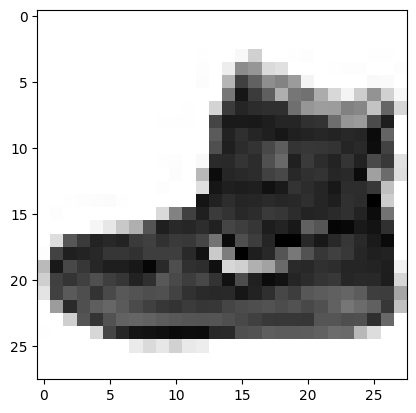

In [7]:
#Show image
plt.imshow(X_train[0], cmap='Greys')

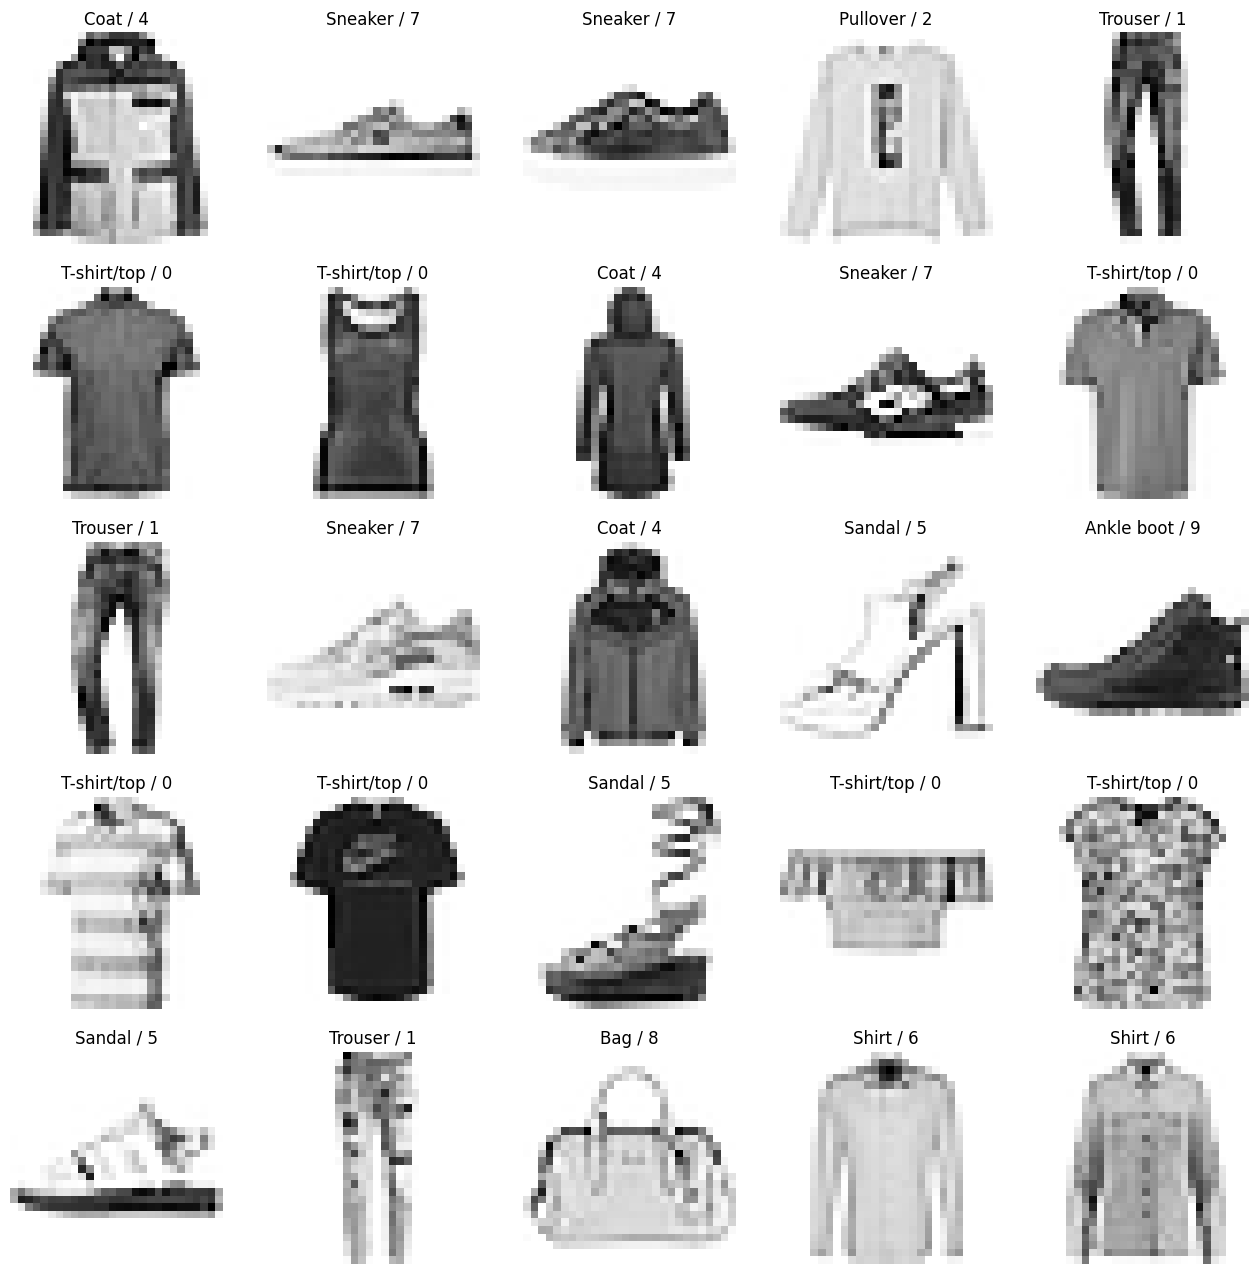

In [8]:
#plotting few labels
plt.figure(figsize=(16,16))

j=1
for i in np.random.randint(0, 1000, 25):
  plt.subplot(5,5,j); j+=1
  plt.imshow(X_train[i], cmap="Greys")
  plt.axis('off') # off the axis
  plt.title('{} / {}'.format(class_labels[y_train[i]], y_train[i]))



In [9]:
X_train.shape

(60000, 28, 28)

In [10]:
X_train.ndim

3

In [11]:
#Changing dimention
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

In [12]:
X_train.ndim

4

In [13]:
#Feature Scaling
X_train = X_train/255
X_test = X_test/255

In [14]:
#train and test
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size= 0.2, random_state=2020)

In [15]:
X_train.shape,  y_train.shape, X_validation.shape, y_validation.shape

((48000, 28, 28, 1), (48000,), (12000, 28, 28, 1), (12000,))

In [16]:
#CNN model
cnn_model = keras.models.Sequential([
                         keras.layers.Conv2D(filters=32, kernel_size=3, strides=(1,1), padding='valid',activation= 'relu', input_shape=[28,28,1]),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dense(units=10, activation='softmax')
])

In [17]:
cnn_model.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [18]:
# training the model
cnn_model.fit(X_train, y_train, epochs=10, batch_size=512, verbose=1, validation_data=(X_validation, y_validation))

Epoch 1/10
94/94 [==============================] - 13s 19ms/step - loss: 0.6323 - accuracy: 0.7845 - val_loss: 0.4257 - val_accuracy: 0.8528
Epoch 2/10
94/94 [==============================] - 1s 11ms/step - loss: 0.3783 - accuracy: 0.8690 - val_loss: 0.3717 - val_accuracy: 0.8719
Epoch 3/10
94/94 [==============================] - 1s 11ms/step - loss: 0.3382 - accuracy: 0.8805 - val_loss: 0.3364 - val_accuracy: 0.8814
Epoch 4/10
94/94 [==============================] - 1s 10ms/step - loss: 0.3034 - accuracy: 0.8938 - val_loss: 0.3232 - val_accuracy: 0.8875
Epoch 5/10
94/94 [==============================] - 1s 9ms/step - loss: 0.2840 - accuracy: 0.9010 - val_loss: 0.3122 - val_accuracy: 0.8908
Epoch 6/10
94/94 [==============================] - 1s 9ms/step - loss: 0.2653 - accuracy: 0.9056 - val_loss: 0.2987 - val_accuracy: 0.8957
Epoch 7/10
94/94 [==============================] - 1s 9ms/step - loss: 0.2493 - accuracy: 0.9112 - val_loss: 0.2867 - val_accuracy: 0.9003
Epoch 8/10
94/9

In [19]:
np.argmax(cnn_model.predict(np.expand_dims(X_test[0],axis=0)).round(2))

1/1 [==============================] - 0s 116ms/step


9

In [20]:
y_test[0]

9

In [21]:
#testing the model
y_pred = cnn_model.predict(X_test)
y_pred.round(2)

313/313 [==============================] - 1s 2ms/step


array([[0.  , 0.  , 0.  , ..., 0.01, 0.  , 0.99],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 0.99, 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.13, 0.04, 0.01]], dtype=float32)

In [22]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [23]:
#evaluate
cnn_model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2878 - accuracy: 0.8979


[0.2878488004207611, 0.8978999853134155]

<Axes: >

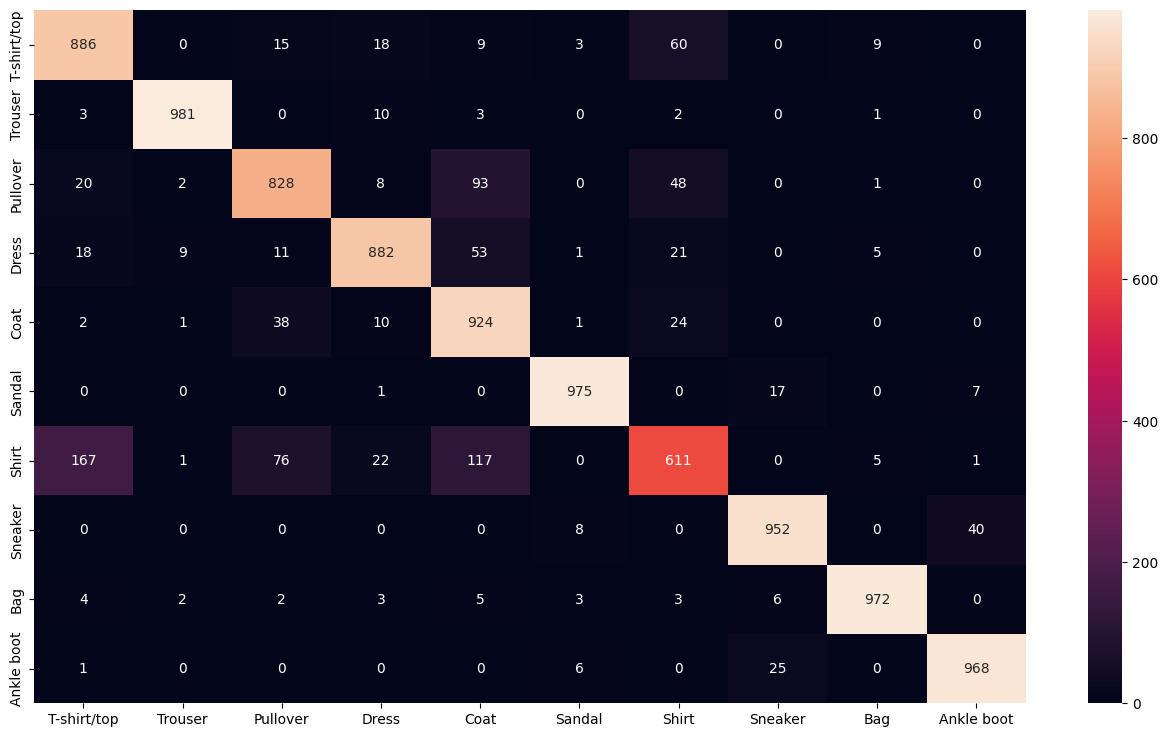

In [26]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(16,9))
y_pred_labels = [ np.argmax(label) for label in y_pred ]
cm = confusion_matrix(y_test, y_pred_labels)

sns.heatmap(cm, annot=True, fmt='d',xticklabels=class_labels, yticklabels=class_labels)

In [27]:
from sklearn.metrics import classification_report
cr= classification_report(y_test, y_pred_labels, target_names=class_labels)
print(cr)

              precision    recall  f1-score   support

 T-shirt/top       0.80      0.89      0.84      1000
     Trouser       0.98      0.98      0.98      1000
    Pullover       0.85      0.83      0.84      1000
       Dress       0.92      0.88      0.90      1000
        Coat       0.77      0.92      0.84      1000
      Sandal       0.98      0.97      0.98      1000
       Shirt       0.79      0.61      0.69      1000
     Sneaker       0.95      0.95      0.95      1000
         Bag       0.98      0.97      0.98      1000
  Ankle boot       0.95      0.97      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000

